## This notebook can be used to rank a list of nodes from a category that connect to an entity such as a gene. 
#### Example 1: Identify drugs that has been approved or in-clinical-trial or in-test-for ovarian cancer


In [1]:
from TCT import node_normalizer
from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query
from TCT import TCT

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import numpy as np


### Load Translator resources


In [2]:
def load_translator_resources():
    """
    Load the necessary resources for the Translator.
    """
    Translator_KP_info,APInames= translator_kpinfo.get_translator_kp_info()
    metaKG = translator_metakg.get_KP_metadata(APInames) 
    APInames,metaKG = translator_metakg.add_plover_API(APInames, metaKG)
    return  APInames, metaKG, Translator_KP_info



In [ ]:

APInames, metaKG, Translator_KP_info= TCT.load_translator_resources()

In [5]:
All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

In [ ]:
# Find everything that is connected to a specific node

In [12]:
APInames

{'ARAX Translator Reasoner - TRAPI 1.5.0': 'https://arax.transltr.io/api/arax/v1.4/query/',
 'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/ctkp/query',
 'Microbiome KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/mbkp/query',
 'Text Mined Cooccurrence API': 'https://cooccurrence.transltr.io/query/',
 'Connections Hypothesis Provider API': 'https://chp-api.transltr.io/query/',
 'SPOKE KP for TRAPI 1.5': 'https://spokekp.transltr.io/api/v1.5/query/',
 'CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/BigGIM_DrugResponse_PerformancePhase/query',
 'RTX KG2 - TRAPI 1.5.0': 'https://kg2cploverdb.ci.transltr.io/kg2c/query',
 'BioThings Explorer (BTE) TRAPI': 'https://bte.transltr.io/v1/query/',
 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/dakp/query',
 'Service Provider TRAPI': 'https://bte.transltr.io/v1/team/Service%20Provider/query/',
 'mediKanren': 'https://medikanren-trapi.transltr.io/query/',


In [21]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = [
    'Clinical Trials KP - TRAPI 1.5.0', 
    'Drug Approvals KP - TRAPI 1.5.0',
    'CATRAX Pharmacogenomics KP - TRAPI 1.5.0'
]

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
print(select_APIs)
print(selected_metaKG.shape)


{'Clinical Trials KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/ctkp/query', 'Drug Approvals KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/dakp/query', 'CATRAX Pharmacogenomics KP - TRAPI 1.5.0': 'https://multiomics.rtx.ai:9990/PharmacogenomicsKG/query'}
(85, 5)


In [22]:
input_node_id, result, result_parsed, result_ranked_by_primary_infores = TCT.Neiborhood_finder('FLT3',
                                                                                            node2_categories = ['biolink:SmallMolecule', 'biolink:Drug', 'biolink:ChemicalEntity'],
                                                                                            APInames = select_APIs,
                                                                                            metaKG = selected_metaKG,
                                                                                            API_predicates = API_predicates)     

NCBIGene:2322
CATRAX Pharmacogenomics KP - TRAPI 1.5.0: Success!
NodeNorm does not know about these identifiers: ChEBI:CHEBI:68647,ChEBI:CHEBI:90695,PUBCHEM:CID:44137946,ChEBI:CHEBI:91395,PUBCHEM:CID:11676971,ChEBI:CHEBI:90217,ChEBI:CHEBI:78543,ChEBI:CHEBI:72317,ChEBI:CHEBI:91441,ChEBI:CHEBI:90237,PUBCHEM:CID:11409972,ChEBI:CHEBI:91435,ChEBI:CHEBI:38940,ChEBI:CHEBI:63452,ChEBI:CHEBI:50924,ChEBI:CHEBI:50928,ChEBI:CHEBI:90304,PUBCHEM:CID:11502647,ChEBI:CHEBI:91471,PUBCHEM:CID:56973714,ChEBI:CHEBI:91348


NodeNorm does not know about these identifiers: PUBCHEM:CID:56973714,ChEBI:CHEBI:91471,PUBCHEM:CID:11502647,ChEBI:CHEBI:90304,ChEBI:CHEBI:50928,ChEBI:CHEBI:50924,ChEBI:CHEBI:63452,ChEBI:CHEBI:38940,ChEBI:CHEBI:91435,PUBCHEM:CID:11409972,ChEBI:CHEBI:90237,ChEBI:CHEBI:91441,ChEBI:CHEBI:72317,ChEBI:CHEBI:78543,ChEBI:CHEBI:90217,PUBCHEM:CID:11676971,ChEBI:CHEBI:91395,PUBCHEM:CID:44137946,ChEBI:CHEBI:90695,ChEBI:CHEBI:68647,ChEBI:CHEBI:91348
[Text(0.5, 0, 'Sorafenib'), Text(2.5, 0, 'PUBCHEM:CID:56973714'), Text(4.5, 0, 'ChEBI:CHEBI:91471'), Text(6.5, 0, 'Quizartinib'), Text(8.5, 0, 'ChEBI:CHEBI:90304'), Text(10.5, 0, 'ChEBI:CHEBI:50924'), Text(12.5, 0, 'ChEBI:CHEBI:38940'), Text(14.5, 0, 'Sorafenib'), Text(16.5, 0, 'PUBCHEM:CID:11409972'), Text(18.5, 0, 'ChEBI:CHEBI:90237'), Text(20.5, 0, 'ChEBI:CHEBI:91441'), Text(22.5, 0, 'Gilteritinib'), Text(24.5, 0, 'ChEBI:CHEBI:90217'), Text(26.5, 0, 'Gilteritinib'), Text(28.5, 0, 'ChEBI:CHEBI:91395'), Text(30.5, 0, 'ChEBI:CHEBI:90695'), Text(32.5, 0,

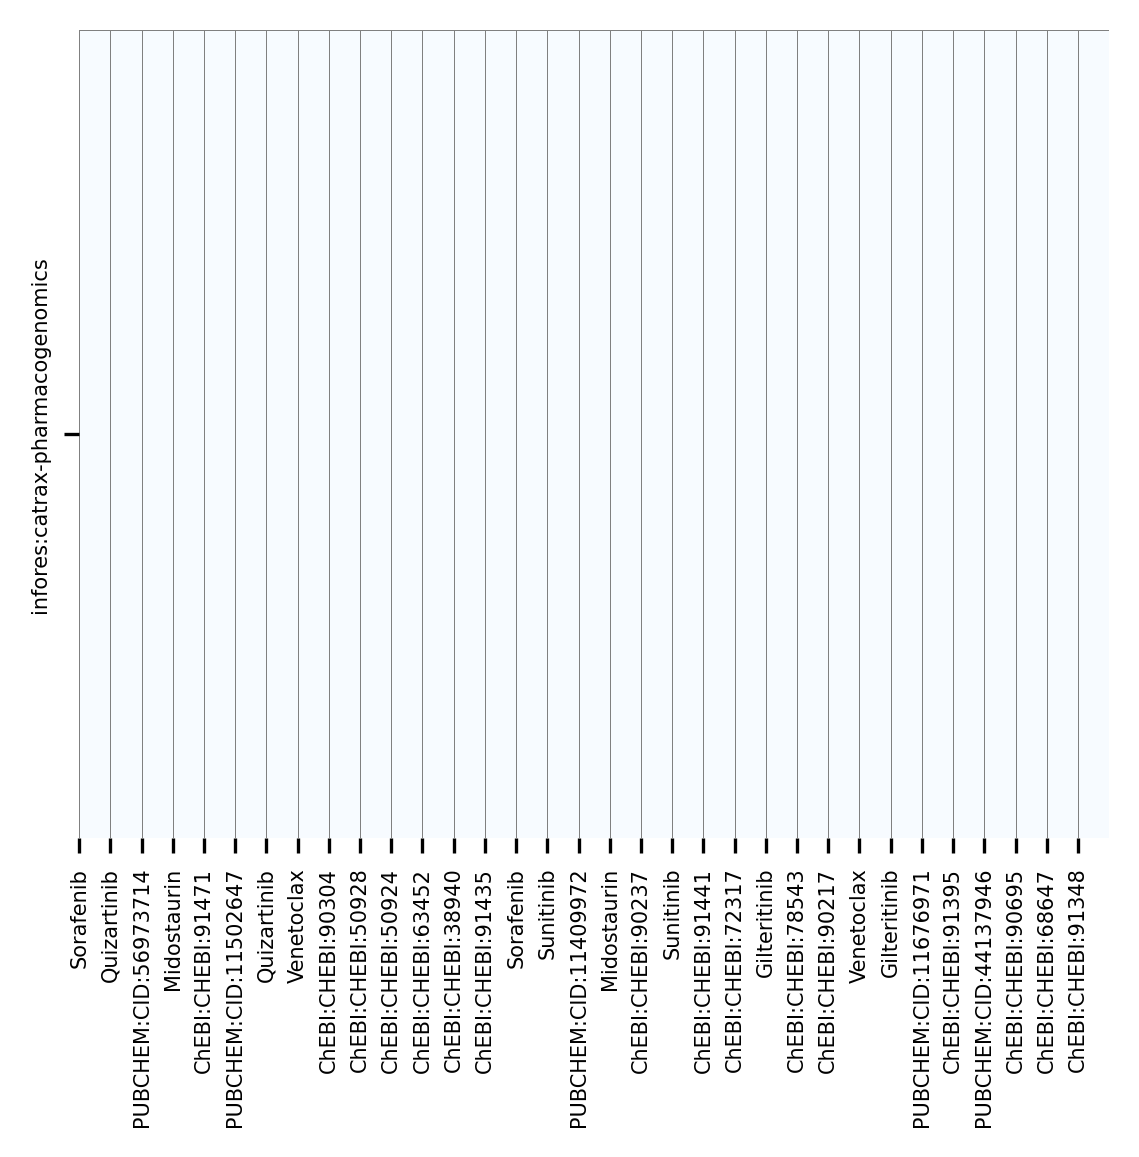

[Text(0.5, 0, 'Sorafenib'), Text(2.5, 0, 'PUBCHEM:CID:56973714'), Text(4.5, 0, 'ChEBI:CHEBI:91471'), Text(6.5, 0, 'Quizartinib'), Text(8.5, 0, 'ChEBI:CHEBI:90304'), Text(10.5, 0, 'ChEBI:CHEBI:50924'), Text(12.5, 0, 'ChEBI:CHEBI:38940'), Text(14.5, 0, 'Sorafenib'), Text(16.5, 0, 'PUBCHEM:CID:11409972'), Text(18.5, 0, 'ChEBI:CHEBI:90237'), Text(20.5, 0, 'ChEBI:CHEBI:91441'), Text(22.5, 0, 'Gilteritinib'), Text(24.5, 0, 'ChEBI:CHEBI:90217'), Text(26.5, 0, 'Gilteritinib'), Text(28.5, 0, 'ChEBI:CHEBI:91395'), Text(30.5, 0, 'ChEBI:CHEBI:90695'), Text(32.5, 0, 'ChEBI:CHEBI:91348')]


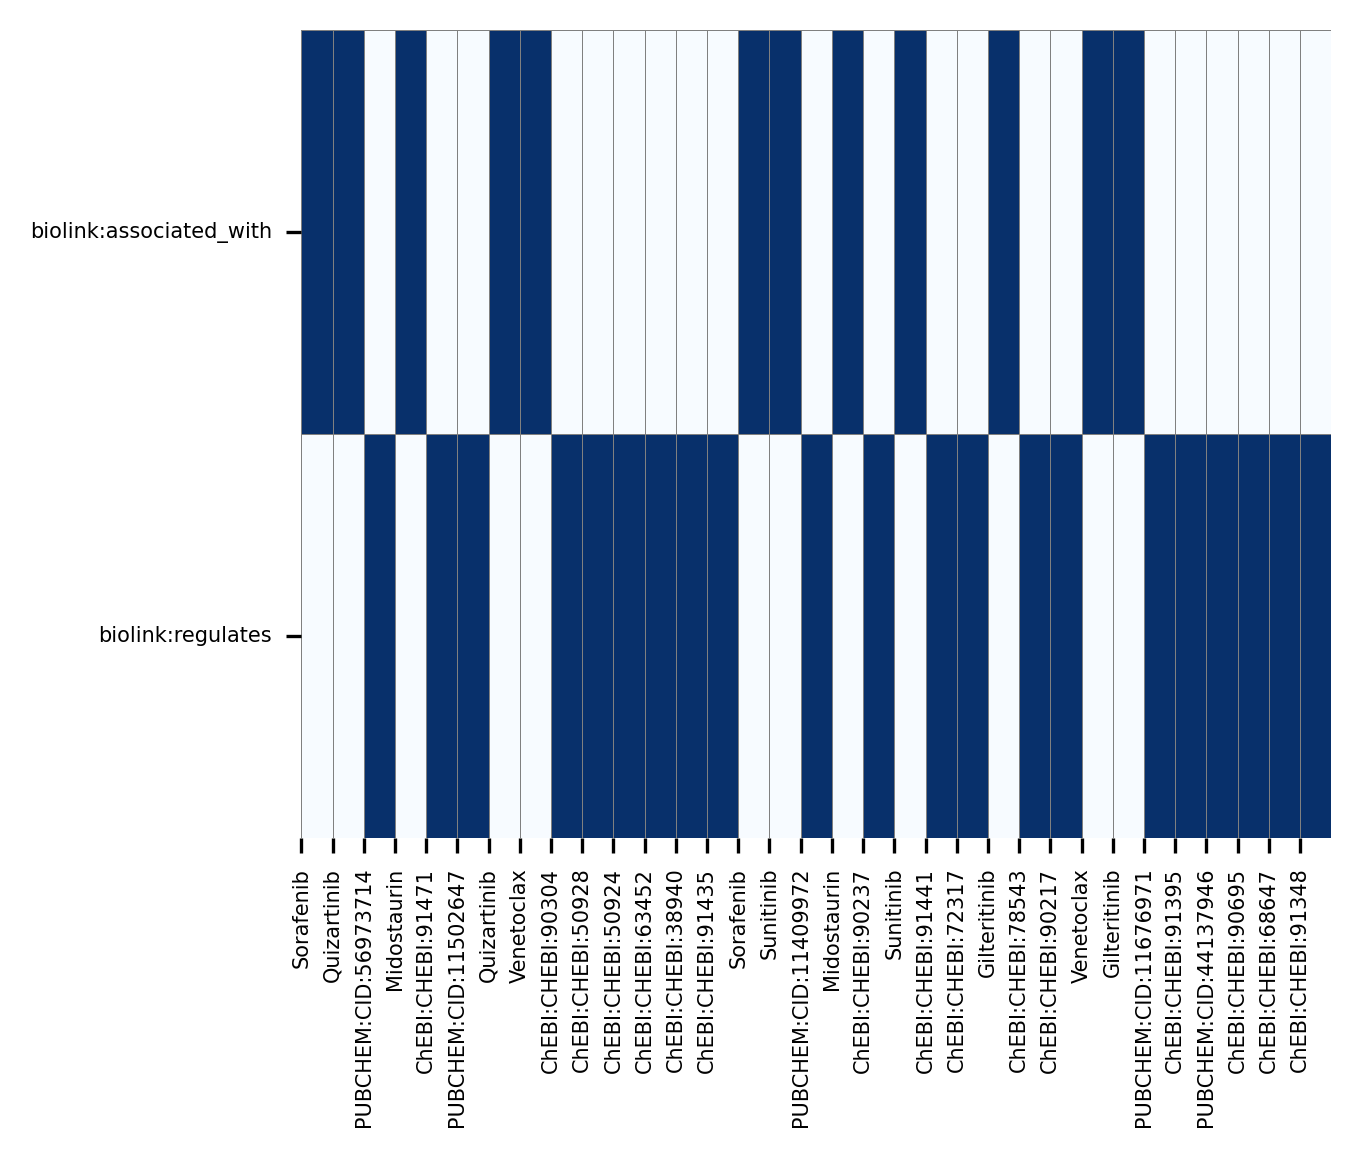

Sorafenib  Quizartinib  PUBCHEM:CID:56973714  \
biolink:associated_with          1            1                     0   
biolink:regulates                0            0                     1   

                         Midostaurin  ChEBI:CHEBI:91471  PUBCHEM:CID:11502647  \
biolink:associated_with            1                  0                     0   
biolink:regulates                  0                  1                     1   

                         Quizartinib  Venetoclax  ChEBI:CHEBI:90304  \
biolink:associated_with            1           1                  0   
biolink:regulates                  0           0                  1   

                         ChEBI:CHEBI:50928  ...  ChEBI:CHEBI:78543  \
biolink:associated_with                  0  ...                  0   
biolink:regulates                        1  ...                  1   

                         ChEBI:CHEBI:90217  Venetoclax  Gilteritinib  \
biolink:associated_with                  0           1             1   
biolink:regulates                        1           0             0   

                         PUBCHEM:CID:11676971  ChEBI:CHEBI:91395  \
biolink:associated_with                     0                  0   
biolink:regulates                           1                  1   

                         PUBCHEM:CID:44137946  ChEBI:CHEBI:90695  \
biolink:associated_with                     0                  0   
biolink:regulates                           1                  1   

                         ChEBI:CHEBI:68647  ChEBI:CHEBI:91348  
biolink:associated_with                  0                  0  
biolink:regulates                        1                  1  

[2 rows x 33 columns]

In [23]:
# Step 8: Visualize the results
TCT.visulization_one_hop_ranking(result_ranked_by_primary_infores, result_parsed, 
                                num_of_nodes = 50, input_query = input_node_id, 
                                fontsize = 5)

In [24]:
result

{'14f2fe84-0094-5c93-abf2-1c0228195d8f': {'attributes': [{'attribute_source': 'infores:catrax-pharmacogenomics',
    'attribute_type_id': 'biolink:agent_type',
    'value': 'automated_agent'},
   {'attribute_source': 'infores:catrax-pharmacogenomics',
    'attribute_type_id': 'biolink:knowledge_level',
    'value': 'knowledge_assertion'},
   {'attribute_type_id': 'knowledge_source', 'value': 'PharmGKB'},
   {'attribute_source': 'infores:catrax-pharmacogenomics',
    'attribute_type_id': 'biolink:publications',
    'value': 28362716,
    'value_type_id': 'biolink:Uriorcurie'}],
  'object': 'NCBIGene:2322',
  'predicate': 'biolink:associated_with',
  'sources': [{'resource_id': 'infores:catrax-pharmacogenomics',
    'resource_role': 'primary_knowledge_source'},
   {'resource_id': 'infores:pubmed-central',
    'resource_role': 'supporting_data_source'}],
  'subject': 'PUBCHEM.COMPOUND:216239'},
 '168de355-1ce8-5136-aead-ac8ebf33af95': {'attributes': [{'attribute_source': 'infores:catrax-p

In [ ]:
# End of the example
